# Detección de Outliers

Los datos que usaremos en este notebook, "DS_Clase_13_Data_1.csv" y "DS_Clase_13_Data_2.csv",  fueron simulados con algún criterio desconocido. Uno de los archivos contiene "valores atípicos" y el otro no. El objetivo de este Notebook es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.

## Ejercicios

Analizar, siguiendo las siguientes instrucciones, el archivo "DS_Clase_13_Data_1.csv". No se olviden de ir escribiendo las conclusiones a las que llegan a medida que avancen. Una vez completado, repetir para "DS_Clase_13_Data_2.csv".

1. Exploración de datos.
    1. Abrir los datos y explorarlos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
    2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
2. Reescaleo de datos
    1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Manejo de Outliers
    1. Aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
    2. Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?
    

### 1. Exploración de Datos

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [3]:
data =  pd.read_csv('dataset/DS_Clase_13_Data_1.csv')
data.head()

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120


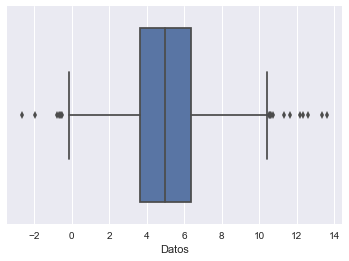

In [33]:
sns.boxplot(data.Datos)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


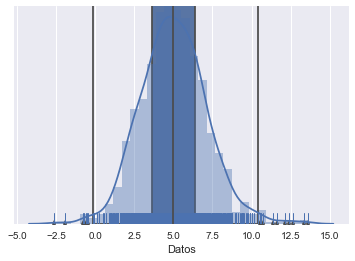

In [11]:
sns.boxplot(data.Datos)
sns.distplot(data.Datos, hist=True, kde=True, rug=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


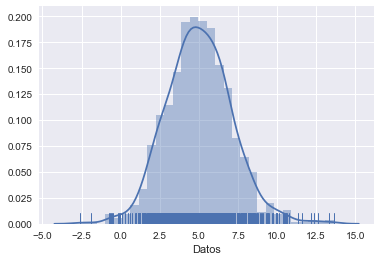

In [10]:
sns.distplot(data.Datos, hist=True, kde=True, rug=True)

In [12]:
data.Datos.describe()

count    1000.000000
mean        5.025683
std         2.106128
min        -2.619781
25%         3.627977
50%         4.990537
75%         6.360215
max        13.613645
Name: Datos, dtype: float64

### 2. Reescaleo de datos

In [29]:
from sklearn.preprocessing import StandardScaler

valor_medio = data.Datos.mean()
std = data.Datos.std()

#data['Datos_Reescalados'] = COMPLETAR
#data.head()
##Tener en cuenta la versión por que es necesario realizar reshape
scaler = StandardScaler()
data['Datos_Reescalados'] = scaler.fit_transform(data)
data.head()


,Datos,Datos_Reescalados
0,2.370556,-1.261298
1,3.437876,-0.754276
2,6.300131,0.605417
3,5.403170,0.179322
4,5.722120,0.330837


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


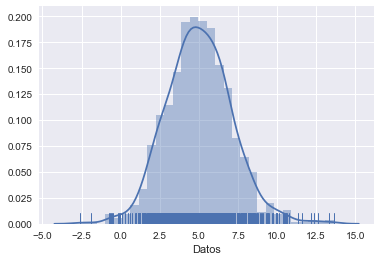

In [37]:
sns.distplot(data.Datos, hist=True, kde=True, rug=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


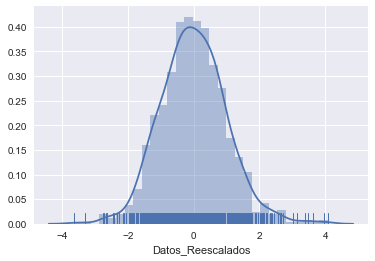

In [38]:
sns.distplot(data.Datos_Reescalados, hist=True, kde=True, rug=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


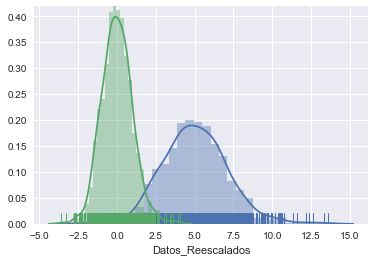

In [34]:
sns.distplot(data.Datos, hist=True, kde=True, rug=True)
sns.distplot(data.Datos_Reescalados, hist=True, kde=True, rug=True)

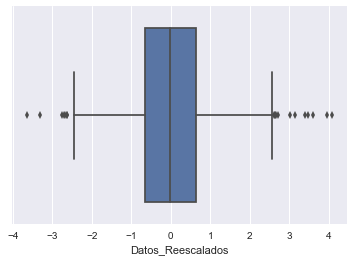

In [41]:
sns.boxplot(data.Datos_Reescalados)

In [47]:
condition = (data['Datos_Reescalados'] >= 3  )
data[condition]

,Datos,Datos_Reescalados
86,12.633931,3.614241
388,12.166490,3.392186
561,11.357649,3.007953
624,11.628151,3.136452
662,13.613645,4.079647
899,12.367070,3.487470
941,13.348289,3.953591


### 3. Manejo de outliers

1. Rango intercuartílico.

In [14]:
q25,q75 = COMPLETAR
iqr = COMPLETAR
minimo = COMPLETAR
maximo = COMPLETAR

print(q25,q75,iqr, minimo, maximo)

TypeError: 'method' object is not subscriptable

In [13]:
mascara_outliers = np.logical_or(COMPLETAR, COMPLETAR)
mascara_outliers.sum()

NameError: name 'COMPLETAR' is not defined

2. Regla de las tres sigmas

In [ ]:
valor_medio = COMPLETAR
std = COMPLETAR
minimo = COMPLETAR
maximo = COMPLETAR

In [ ]:
mascara_outliers = np.logical_or(COMPLETAR, COMPLETAR)
mascara_outliers.sum()

**Para pensar**: ¿se podía aplicar más fácilmente la regla de las tres sigmas usando la columna `Datos_Reescalados`?